In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# load the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [23]:
# extract the disired colums
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
#train test split 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'], test_size= 0.3)


In [30]:
x_train.shape

(280, 2)

In [41]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit x_train
scaler.fit(x_train)

# transform 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [46]:
# convert the numpy array to dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)
x_train_scaled

,Age,EstimatedSalary
0,-0.809212,-0.181731
1,-0.809212,-0.726599
2,-0.237283,-0.696328
3,1.764470,-0.212001
4,0.048682,0.120974
...,...,...
275,2.145756,0.484219
276,-1.190498,-1.029303
277,-1.762427,-1.392548
278,-0.713890,1.210709


## effect scaling

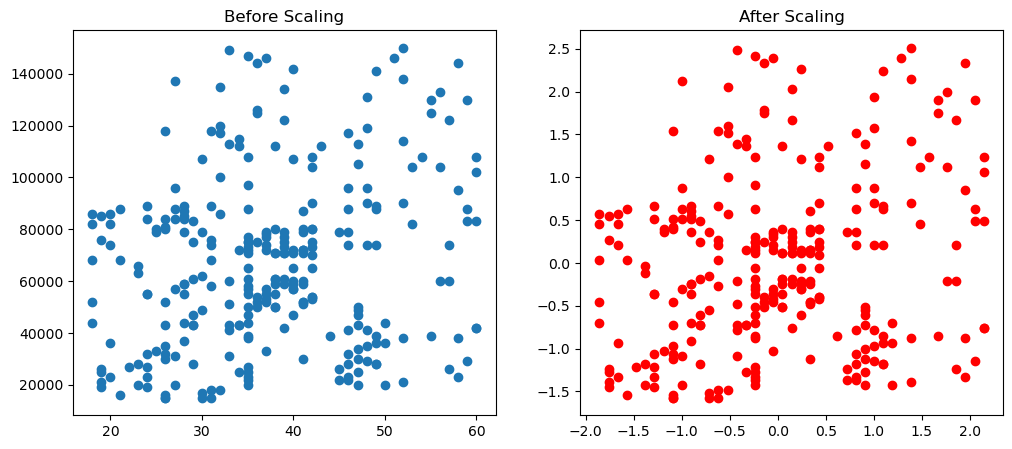

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

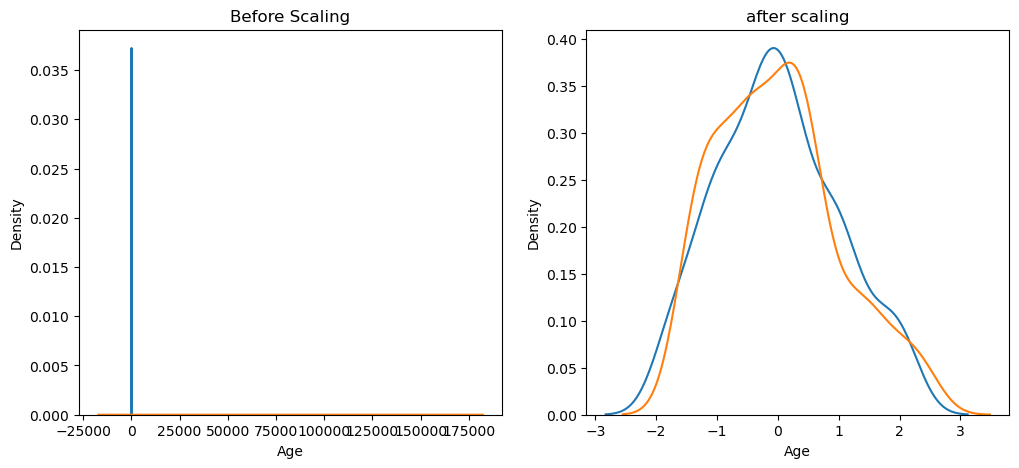

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

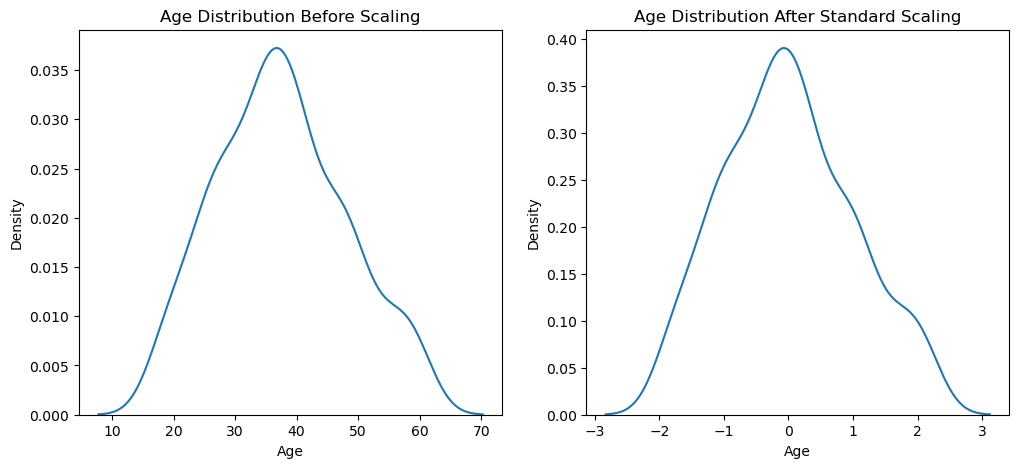

In [76]:
# distribution comparison
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

## why use scaling

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [83]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [90]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.825
Scaled 0.8083333333333333


### decision tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
DecisionTreeClassifier()
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8333333333333334
Scaled 0.8166666666666667
